# Image processing project
### Sickle Cell Anemia

Research for the disease

https://www.mayoclinic.org/diseases-conditions/sickle-cell-anemia/symptoms-causes/syc-20355876

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [ ]:
img = cv.imread('test1.png')

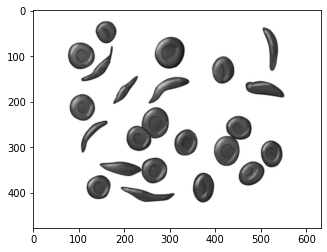

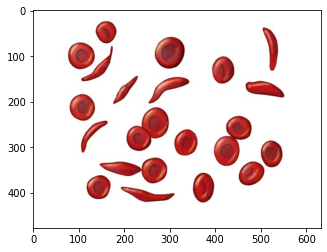

In [ ]:
imgGray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
 
plt.imshow(imgGray,cmap="gray")
plt.show()
plt.imshow(img)
plt.show()

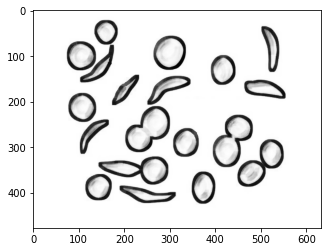

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
gradient = cv.morphologyEx(imgGray, cv.MORPH_GRADIENT, kernel = np.ones((7,7)))

plt.imshow(gradient,cmap='Greys' )
plt.show()
gradient

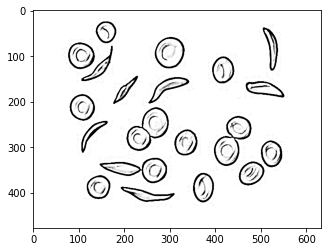

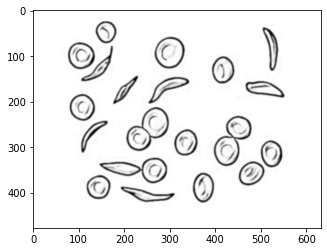

In [ ]:
blur = cv.GaussianBlur(imgGray,(7,7),0)

dst = cv.Laplacian(blur, -1, ksize=5)

dst_blur = cv.GaussianBlur(dst,(7,7),0)

plt.imshow(dst,cmap='Greys')
plt.show()
plt.imshow(dst_blur,cmap='Greys')
plt.show()



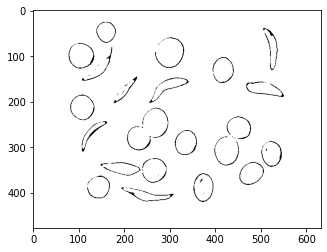

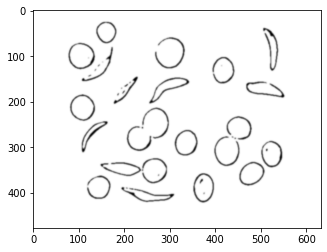

In [ ]:
t = dst_blur.copy()


(T, thresh) = cv.threshold(t, 200, 255, cv.THRESH_BINARY)


plt.imshow(thresh,cmap='Greys')
plt.show()

dilation = cv.dilate(thresh,kernel = np.ones((2,2)),iterations = 1)


dilation_blur = cv.GaussianBlur(dilation,(7,7),0)

plt.imshow(dilation_blur,cmap='Greys')
plt.show()


In [ ]:
dilation.max()

255

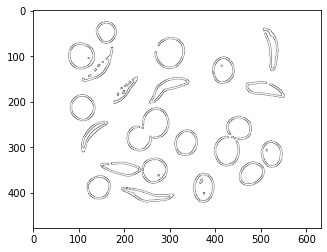

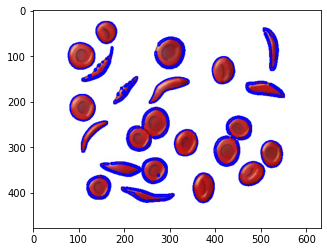

In [ ]:
imgCopy = img.copy()


coins_edges = cv.Canny(dilation_blur ,70,150)



contours, hierarchy = cv.findContours(coins_edges,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(imgCopy,contours,-1,(0,0,255),2)


plt.imshow(coins_edges,cmap='Greys')
plt.show()
plt.imshow(imgCopy,cmap='Greys')
plt.show()

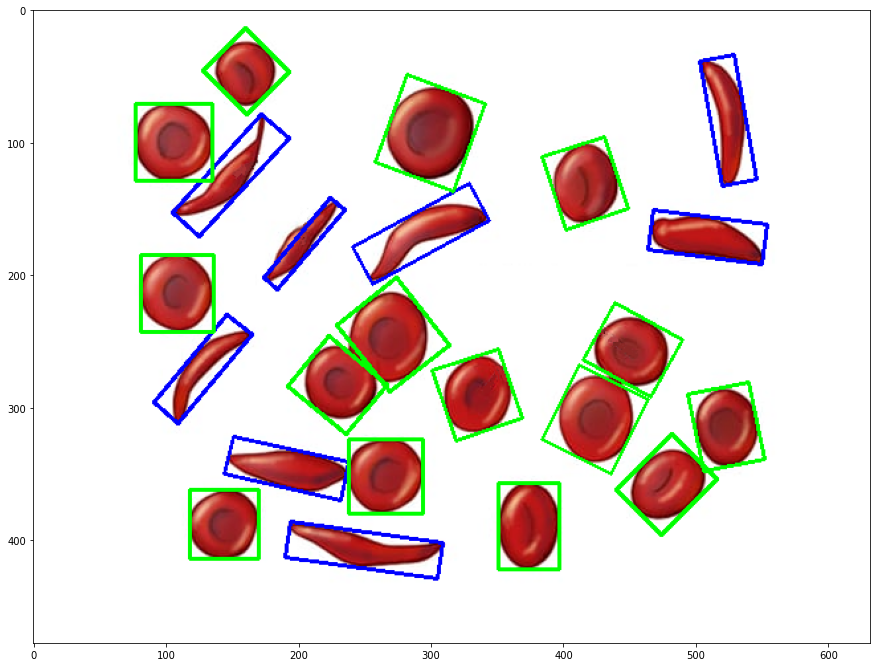

In [ ]:
imgCopy = img.copy()
ll = []
lll = []

for i in contours:
  M = cv.moments(i)
  if M['m00'] != 0:
    x = int(M['m10']/M['m00'])
    y = int(M['m01']/M['m00'])
    if(x,y) not in ll:
      ll.append((x,y))
      lll.append(i)





for i in contours:
  rect = cv.minAreaRect(i)
  x , y = rect[1]
  if x*y >= 900:
    box = cv.boxPoints(rect)
    box = np.int0(box)
    if abs(x - y) <=  30:
      cv.drawContours(imgCopy,[box],0,(0,255,0),2)
    else:
      cv.drawContours(imgCopy,[box],0,(0,0,255),2)


plt.figure(figsize=(15,15))
plt.imshow(imgCopy)
plt.show()

# Final Result

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

img = cv.imread('test1.png')

def f2(img):

  imgGray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
 
  blur = cv.GaussianBlur(imgGray,(7,7),0)

  dst = cv.Laplacian(blur, -1, ksize=5)

  dst_blur = cv.GaussianBlur(dst,(7,7),0)


  (T, thresh) = cv.threshold(dst_blur, 200, 255, cv.THRESH_BINARY)

  dilation = cv.dilate(thresh,kernel = np.ones((2,2)),iterations = 1)

  dilation_blur = cv.GaussianBlur(dilation,(7,7),0)

  imgCopy = img.copy()

  edges = cv.Canny(dilation_blur ,70,150)

  contours, hierarchy = cv.findContours(edges,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)


  RedBloodCells = 0
  SickleCell = 0 

  for i in contours:
    rect = cv.minAreaRect(i)
    x , y = rect[1]
    if x * y >= 900:
      box = cv.boxPoints(rect)
      box = np.int0(box)
      if abs(x - y) <= 30:
        cv.drawContours(imgCopy,[box],0,(0,255,0),2)
        RedBloodCells += 1
      else:
        cv.drawContours(imgCopy,[box],0,(0,0,255),2)
        SickleCell += 1

  cv.putText(imgCopy,"Red Blood Cells: {0}".format(RedBloodCells), (10, 40), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0))
  cv.putText(imgCopy,"Sickle Cell: {0}".format(SickleCell), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0))
  plt.figure(figsize=(15,15))
  plt.imshow(imgCopy)
  plt.show()

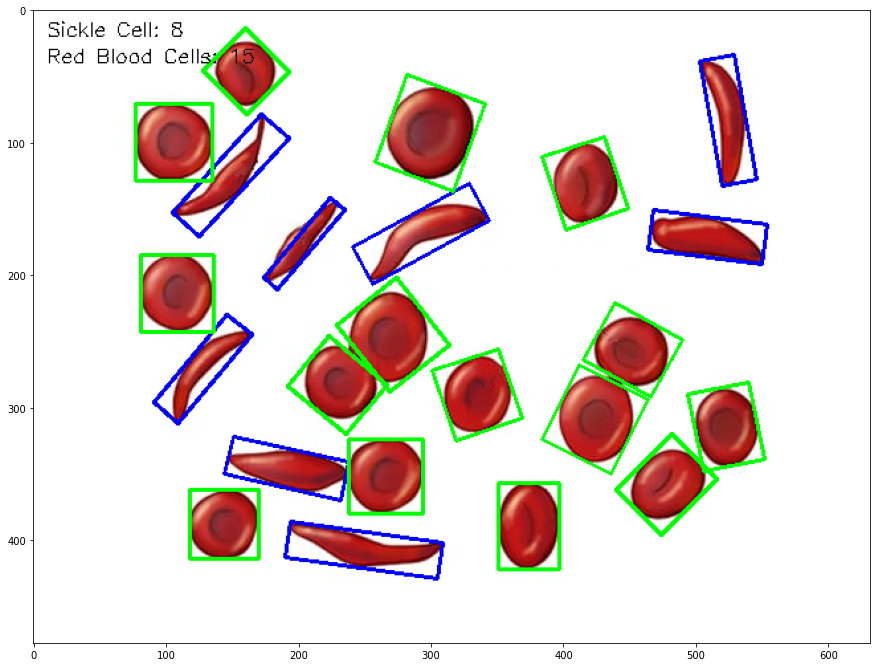

In [ ]:
img = cv.imread('test1.png')

f2(img)

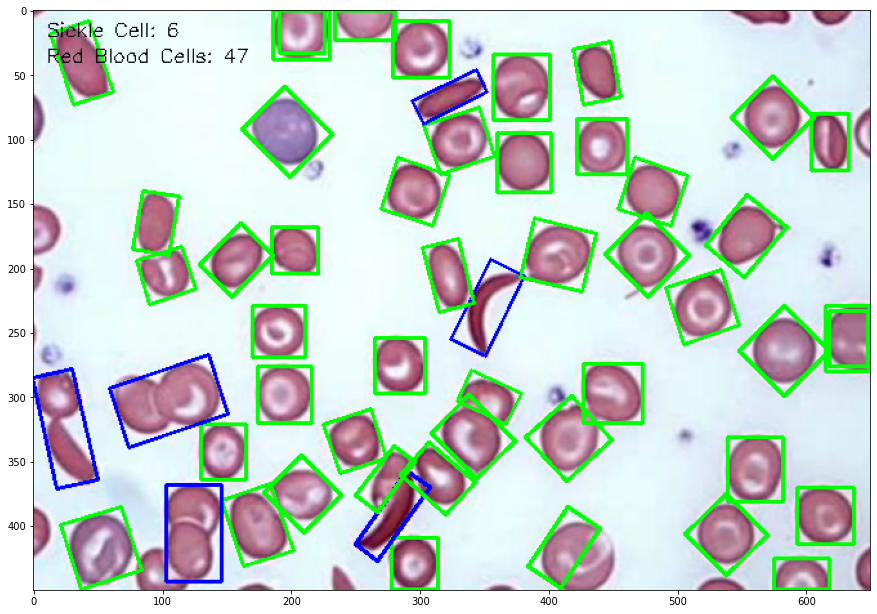

In [ ]:
img = cv.imread('yuyu.jpg')

f2(img)

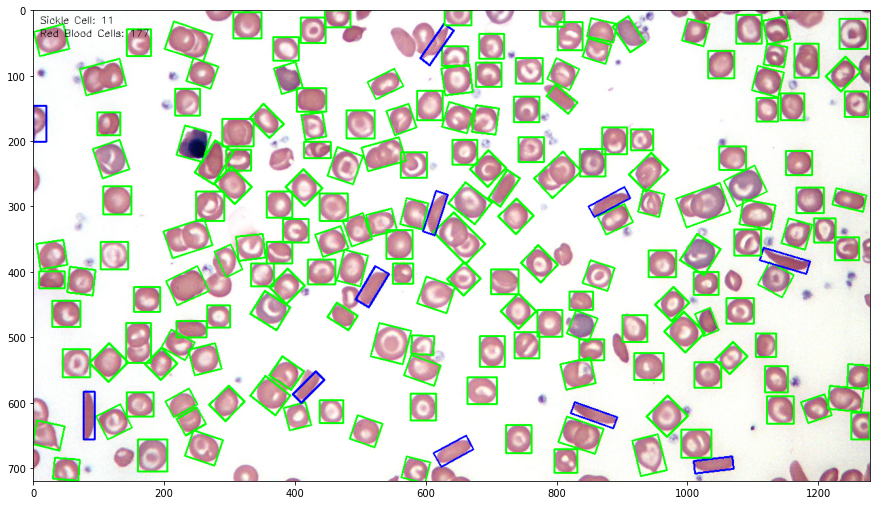

In [ ]:
img = cv.imread('sickle_cell_blood_smear.jpg')

f2(img)

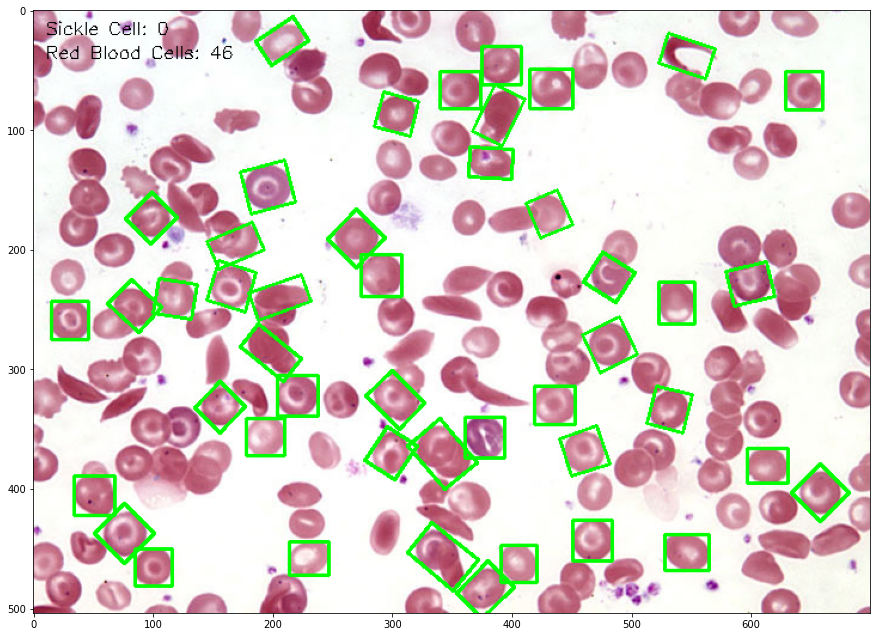

In [ ]:
img = cv.imread('pathology_sicklecellanemia40x02.jpg')

f2(img)

## Some Tests

In [ ]:
np.shape(contours)
contours

In [ ]:
len(contours)

40

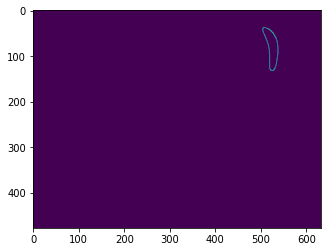

In [ ]:
retval, labels = cv.connectedComponents(coins_edges)

plt.imshow(labels == 5)
plt.show()

In [ ]:
t = list(contours)

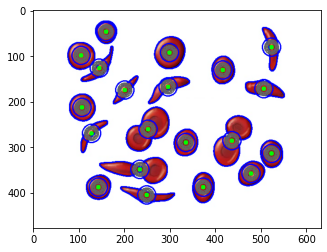

In [ ]:
for i in t:
  M = cv.moments(i)
  x = int(M['m10']/M['m00'])
  y = int(M['m01']/M['m00'])
  cv.circle(imgCopy,(x,y),5,(0,255,0),-1)
  cv.circle(imgCopy,(x,y),20,(0,0,255),2)

plt.imshow(imgCopy)
plt.show()

In [ ]:
retval, labels = cv.connectedComponents(imgBWblur)
for i in range(0,20):
  plt.imshow(labels == i)
  plt.show()

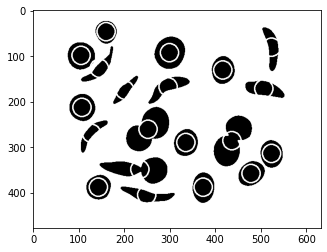

In [ ]:
for i in t:
  M = cv.moments(i)
  x = int(M['m10']/M['m00'])
  y = int(M['m01']/M['m00'])
  cv.circle(imgBWblurCopy,(x,y),20,(0,0,0),2)

plt.imshow(imgBWblurCopy,cmap='Greys')
plt.show()

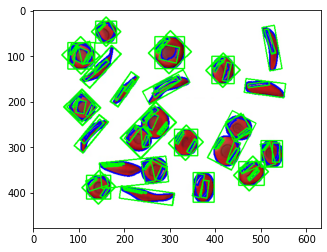

In [ ]:
for i in contours:
  rect = cv.minAreaRect(i)
  box = cv.boxPoints(rect)
  box = np.int0(box)
  cv.drawContours(imgCopy,[box],0,(0,255,0),2)


plt.imshow(imgCopy)
plt.show()

In [ ]:
rect

((160.25001525878906, 47.24999237060547),
 (47.37614822387695, 46.66904067993164),
 45.0)

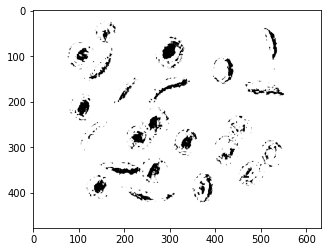

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:

result = img.copy()
image = cv.cvtColor(result, cv.COLOR_RGB2HSV)
lower = np.array([155,25,0])
upper = np.array([179,255,255])

mask = cv.inRange(image, lower, upper)
result = cv.bitwise_and(result, result, mask=mask)

plt.imshow(mask,cmap='Greys')
plt.show()




mask


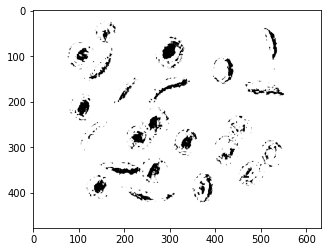

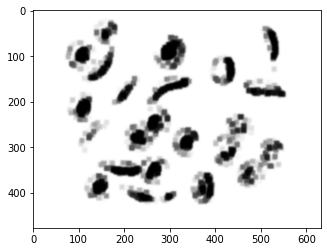

In [ ]:
t112 = mask.copy()

(T, thresh1) = cv.threshold(t112, 200, 255, cv.THRESH_BINARY)


plt.imshow(thresh1,cmap='Greys')
plt.show()


dilation_blur1 = cv.GaussianBlur(thresh1,(7,7),0)


dilation1 = cv.dilate(dilation_blur1,kernel = np.ones((3,3)),iterations = 4)


dilation_blur1 = cv.GaussianBlur(dilation1,(7,7),0)

plt.imshow(dilation_blur1,cmap='Greys')
plt.show()


In [ ]:
retval, labels = cv.connectedComponents(coins_edges)

plt.imshow(labels == 5)
plt.show()